# {code}`deepmax.add` basis

In [1]:
# global imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

from deepmax.cooker import P,R,Zcooker,Z_N,set_n
from deepmax.empirical import Ye
from deepmax.plot import grid,contours

In [2]:
# using mult basis
from deepmax.add import wchiC
set_n(*wchiC)

N=26
Z0=Z_N(Ye,N,alpha=1.35)
Zc=Zcooker(Z0)
Hc=-Zc[-1].imag
Hc/2/np.pi

np.float64(0.14106343855989575)

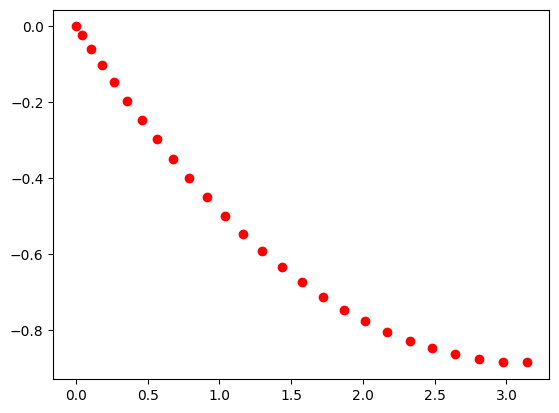

In [3]:
plt.plot(Zc.real,Zc.imag,'ro')

In [4]:
from scipy.interpolate import CubicSpline as CS

YCS=CS(Zc.real,Zc.imag)

In [5]:
YCS(np.pi)

array(-0.88632772)

In [6]:
Cc=wchiC[-1](Zc)

In [7]:
Cc

array([ 1.00000000e+00,  1.17855296e-01, -1.45273178e-02, -4.46581508e-03,
       -2.03180771e-03, -1.14168595e-03, -7.21166999e-04, -4.91282213e-04,
       -3.53147905e-04, -2.64173143e-04, -2.04389134e-04, -1.60339686e-04,
       -1.36653197e-04, -7.91736322e-05, -2.33893882e-04,  6.42504703e-04,
       -3.30216681e-03,  1.16307619e-02, -2.83912564e-02,  2.33699668e-02,
        1.17132170e-01, -5.26008097e-01,  1.04992641e+00, -1.17727270e+00,
        7.14382368e-01, -1.82868554e-01])

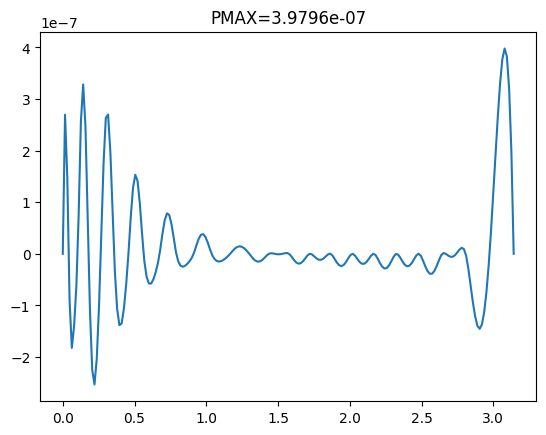

In [8]:
X200=np.linspace(0,np.pi,200)
plt.plot(X200,P(X200+1j*YCS(X200),Cc))
PMAX=max(abs(P(X200+1j*YCS(X200),Cc)))
plt.title(f'PMAX={PMAX:0.4e}')
plt.show()

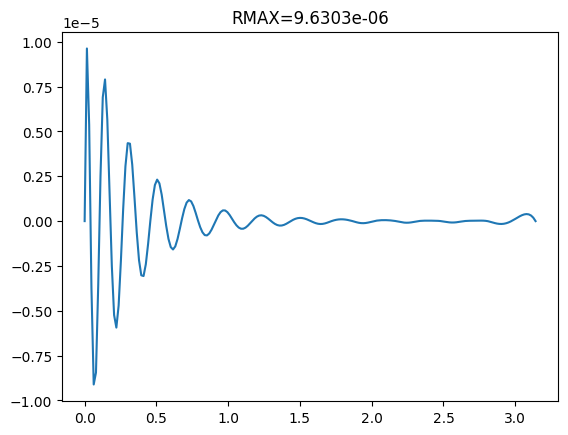

In [9]:
plt.plot(X200,R(X200+1j*YCS(X200),Cc))
RMAX=max(abs(R(X200+1j*YCS(X200),Cc)))
plt.title(f'RMAX={RMAX:0.4e}')
plt.show()

In [10]:
A=np.linspace(1.25,1.45)
ZA=[Zcooker(Z_N(Ye,N,alpha=a)) for a in A]

In [11]:
def PRMAX(Zc):
    X200=np.linspace(0,np.pi,200)
    YCS=CS(Zc.real,Zc.imag)
    Cc=wchiC[-1](Zc)
    PMAX=max(abs(P(X200+1j*YCS(X200),Cc)))
    RMAX=max(abs(R(X200+1j*YCS(X200),Cc)))
    return PMAX,RMAX

In [12]:
PRMA=np.array([PRMAX(Zc) for Zc in ZA]).T

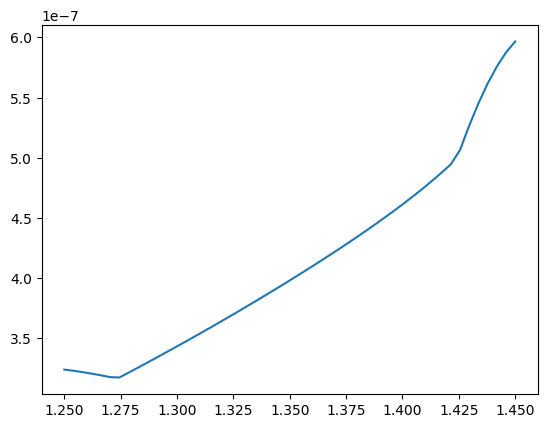

In [13]:
plt.plot(A,PRMA[0])

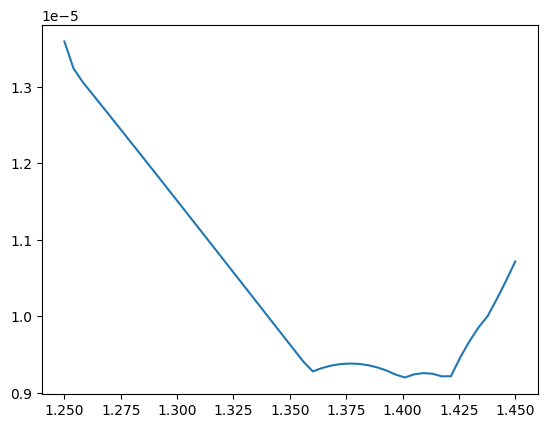

In [14]:
plt.plot(A,PRMA[1])

In [15]:
NN=np.arange(30,47)
ZA=[Zcooker(Z_N(Ye,N,alpha=1.35)) for N in NN]

In [16]:
PRMA=np.array([PRMAX(Zc) for Zc in ZA]).T

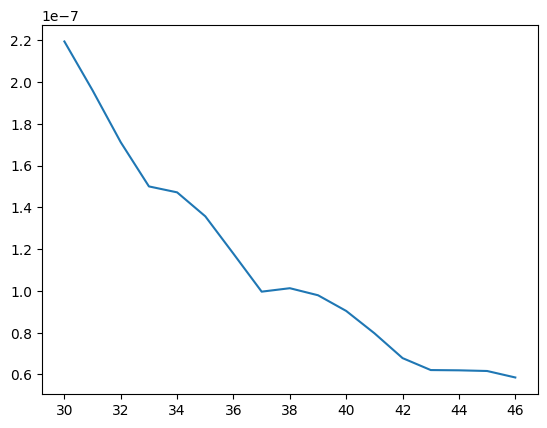

In [17]:
plt.plot(NN,PRMA[0])

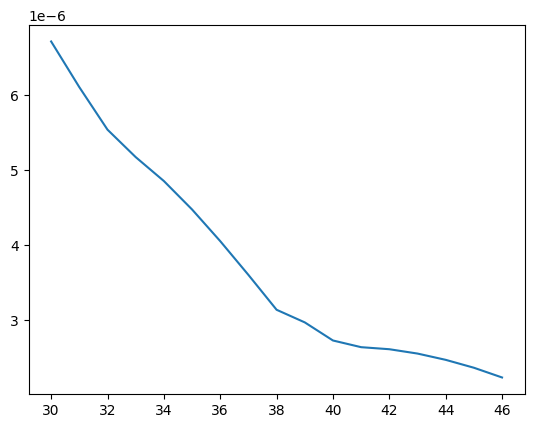

In [18]:
plt.plot(NN,PRMA[1])

In [19]:
ZA[-1][-1]/2/np.pi

np.complex128(0.5-0.14106342634147157j)